In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf
import datetime as dt

In [ ]:
stock_symbol = 'MOTILALOFS.NS'
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 3650)
data = yf.download(stock_symbol , start = start_date, end  = end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MOTILALOFS.NS,MOTILALOFS.NS,MOTILALOFS.NS,MOTILALOFS.NS,MOTILALOFS.NS,MOTILALOFS.NS
Date,,,,,,
2014-11-10 00:00:00+00:00,217.569199,224.649994,228.500000,222.000000,222.449997,22292
2014-11-11 00:00:00+00:00,217.520782,224.600006,225.000000,221.149994,224.000000,6169
2014-11-12 00:00:00+00:00,222.750549,230.000000,230.500000,221.649994,221.649994,24067
2014-11-13 00:00:00+00:00,222.169479,229.399994,232.000000,225.550003,231.699997,14347
2014-11-14 00:00:00+00:00,222.798996,230.050003,230.949997,226.050003,229.000000,18921
...,...,...,...,...,...,...
2024-10-29 00:00:00+00:00,947.799988,947.799988,955.049988,909.299988,934.700012,3457729
2024-10-30 00:00:00+00:00,924.000000,924.000000,954.900024,917.000000,952.400024,2256473


In [ ]:
data = data[['Close']]

In [ ]:
data.head()

Price,Close
Ticker,MOTILALOFS.NS
Date,
2014-11-10 00:00:00+00:00,224.649994
2014-11-11 00:00:00+00:00,224.600006
2014-11-12 00:00:00+00:00,230.000000
2014-11-13 00:00:00+00:00,229.399994
2014-11-14 00:00:00+00:00,230.050003


In [ ]:
# data Preprocessing

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# defining the data's length
training_data_len = int(len(scaled_data)*0.8)
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len:]

In [ ]:
##  creating sequences for LSTM model

def create_sequences(dataset, sequence_length = 60):
  X, y = [], []
  for i in range(len(dataset) - sequence_length):
    X.append(dataset[i : i + sequence_length])
    y.append(dataset[i + sequence_length])
  return np.array(X), np.array(y)


sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
### Building LSTM model

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## compile
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
### Training the model
epochs = 100
batch_size = 16
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0151
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0014
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4385e-04
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.5394e-04
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.8722e-04
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6711e-04
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9295e-04
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5045e-04
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3971e-04
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8485e-04
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7875e-04
Epoch 13/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.3799e-04
Epoch 14/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6042e-

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


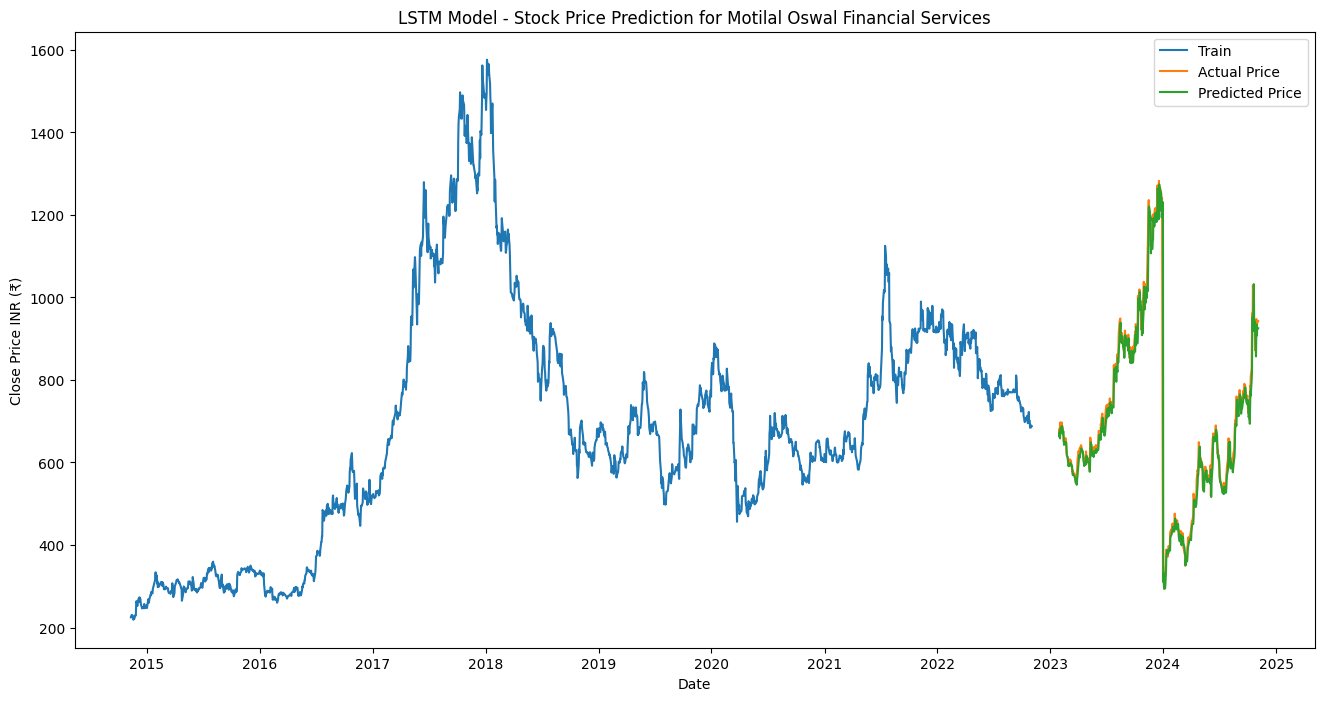

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Unscale predictions

# Reshape y_test to be 2D before inverse transforming
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Unscale actual prices

# Plot the results
train = data[:training_data_len]
# Adjust valid DataFrame to align with predictions length
valid = data[training_data_len + sequence_length:]  # Skip initial sequence length
valid = valid.copy()  # Avoid SettingWithCopyWarning
valid['Predictions'] = predictions  # Add predictions column

# Plotting
plt.figure(figsize=(16, 8))
plt.title('LSTM Model - Stock Price Prediction for Motilal Oswal Financial Services')
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Validation and Predictions')
plt.legend(['Train', 'Actual Price', 'Predicted Price'])
plt.show()
